# 剪断試験
## 


 70dC_wo_heatgun 
         0       1       2        3        4
0   0.000  30.070  72.570  143.700  196.620
1  68.090  62.060  55.340   95.410   70.620
2   4.747   2.256   3.426    5.377   10.576


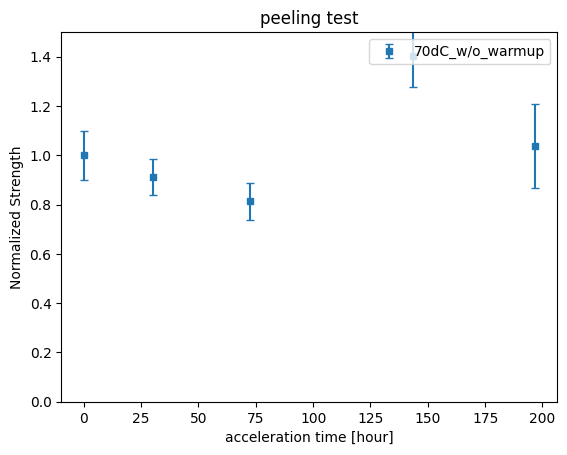

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

T_accel =['70dC_wo_heatgun','80dC','90dC_w_heatgun']
fig, ax = plt.subplots()
colors = ['black','green','blue','red']
ntemp = T_accel.__len__()
label_list = ['70dC_w/o_warmup' ,'80dC','90dC:w heat gun','98dC']

for itemp in range(ntemp):
	temp_accel = T_accel[itemp]
	#filename = f'./shearingArchiveDir/shearing_{temp_accel}.csv'
	filename = f'./peelingArchiveDir/peeling_{temp_accel}.csv'

	df = pd.read_csv(filename
				  	,sep="\t"
					 ,skiprows=1
					 ,header=None
					 )
	print("\n",temp_accel,"\n",df)
	#weight_dataset = df.to_numpy()
	#t_accel = weight_dataset[0]
	#weight_break = weight_dataset[1]
	#weight_err = weight_dataset[2]

	#ax.errorbar(t_accel, weight_break, yerr=weight_err, capsize=3, fmt='s'
	#			, ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
	#			, label=label_list[itemp])

	# 規格化
	weight_dataset = df.to_numpy()
	t_accel = weight_dataset[0]
	initialBreakingWeight = weight_dataset[1][0]
	initialBreakingWeightErr = weight_dataset[2][0]
	breakingWeightRatio = weight_dataset[1]/initialBreakingWeight
	weightRatioErr = breakingWeightRatio*np.sqrt(np.square(weight_dataset[2]/weight_dataset[1])+np.square(initialBreakingWeightErr/initialBreakingWeight))
	ax.errorbar(t_accel, breakingWeightRatio, yerr=weightRatioErr,
						  capsize=3, fmt='s'
							,ms=5 #, mec='k'
				, label=label_list[itemp])
	break


ax.set_xlabel('acceleration time [hour]')
#ax.set_ylabel('adhesive power [kg]')
ax.set_ylabel('Normalized Strength')
plt.legend(loc='upper right')
ax.set_title('peeling test')
plt.ylim([0,1.5])
plt.show()
